Loading dataset and extracting MFCC features...
Processing speaker: Benjamin_Netanyau
Found file: 0.wav
Found file: 1.wav
Found file: 10.wav
Found file: 100.wav
Found file: 1000.wav
Found file: 1001.wav
Found file: 1002.wav
Found file: 1003.wav
Found file: 1004.wav
Found file: 1005.wav
Found file: 1006.wav
Found file: 1007.wav
Found file: 1008.wav
Found file: 1009.wav
Found file: 101.wav
Found file: 1010.wav
Found file: 1011.wav
Found file: 1012.wav
Found file: 1013.wav
Found file: 1014.wav
Found file: 1015.wav
Found file: 1016.wav
Found file: 1017.wav
Found file: 1018.wav
Found file: 1019.wav
Found file: 102.wav
Found file: 1020.wav
Found file: 1021.wav
Found file: 1022.wav
Found file: 1023.wav
Found file: 1024.wav
Found file: 1025.wav
Found file: 1026.wav
Found file: 1027.wav
Found file: 1028.wav
Found file: 1029.wav
Found file: 103.wav
Found file: 1030.wav
Found file: 1031.wav
Found file: 1032.wav
Found file: 1033.wav
Found file: 1034.wav
Found file: 1035.wav
Found file: 1036.wav
Fo

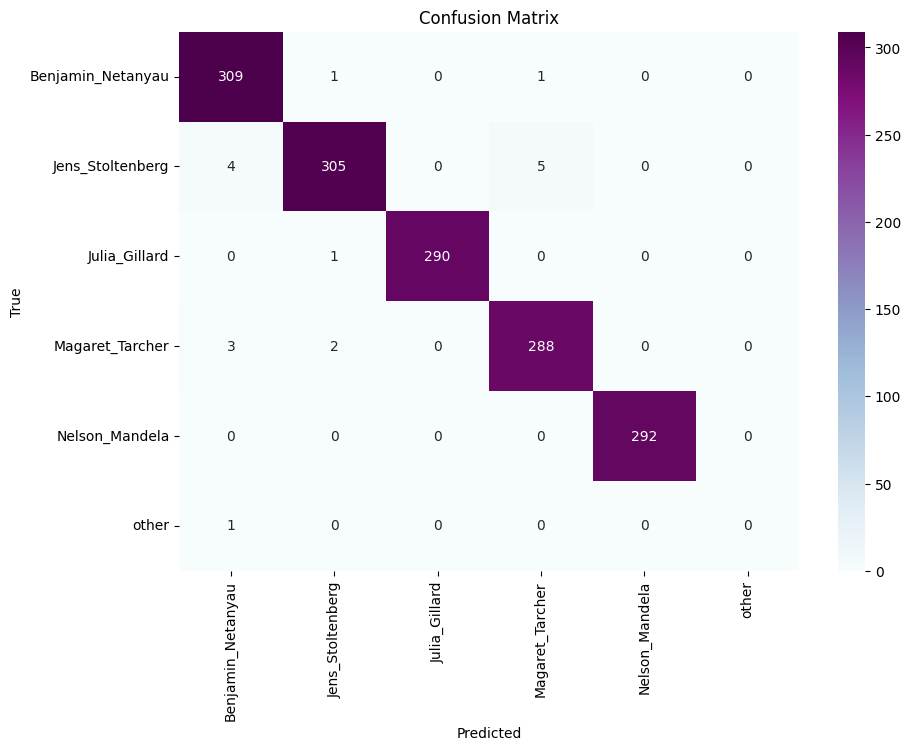

Speaker Identification System Complete!


In [63]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#function to extract MFCC features
def extract_mfcc(file_path, n_mfcc=13):
    try:
        y, sr = librosa.load(file_path, sr=None)  # Load the audio file
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # Extract MFCC features
        mfcc_mean = np.mean(mfcc.T, axis=0)  # Compute mean across time
        return mfcc_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

#load the dataset & extract features
def load_dataset(dataset_path):
    X = []  #feature list
    y = []  #label list
    label_map = {}  
    current_label = 0


    for speaker_folder in os.listdir(dataset_path):
        speaker_path = os.path.join(dataset_path, speaker_folder)
        
        if os.path.isdir(speaker_path):
            print(f"Processing speaker: {speaker_folder}")
            label_map[current_label] = speaker_folder
            
            found = False
            for file in os.listdir(speaker_path):
                if file.endswith('.wav'):
                    found = True
                    print(f"Found file: {file}")
                    file_path = os.path.join(speaker_path, file)
                    mfcc_features = extract_mfcc(file_path)
                    if mfcc_features is not None:
                        X.append(mfcc_features)
                        y.append(current_label)
            
            if not found:
                print(f"No .wav files found in {speaker_folder}")
            
            current_label += 1

    return np.array(X), np.array(y), label_map

#main fn
def main():
    dataset_path = r"c:/Users/shrav/archive/16000_pcm_speeches"  #Update with your dataset path
    
    print("Loading dataset and extracting MFCC features...")
    X, y, label_map = load_dataset(dataset_path)
    
    if len(X) == 0 or len(y) == 0:
        print("No valid audio data found. Please check the dataset path and structure.")
        return
    
    #split data into training & testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #train SVM classifier
    print("Training the SVM model...")
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    
    #predict and evaluate
    print("Evaluating the model...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%\n")
    
    #get the unique classes in y_test
    unique_labels = np.unique(y_test)
    
    #create target_names based on the unique labels in y_test
    target_names = [label_map[label] for label in unique_labels]
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names, labels=unique_labels, zero_division=1))
    
    cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
    plt.figure(figsize=(10, 7))

    cmap=sns.color_palette("BuPu", 6, as_cmap=True)
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=target_names, yticklabels=target_names)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print("Speaker Identification System Complete!")


if __name__ == "__main__":
    main()
